In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!pip install flair

# Language Model

In [5]:
from flair.data import Dictionary, Sentence
from flair.models import LanguageModel
from flair.embeddings import WordEmbeddings, FlairEmbeddings
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus
import pickle

## Tạo từ điển

In [6]:
# make an empty character dictionary
char_dictionary: Dictionary = Dictionary()

# counter object
import collections
counter = collections.Counter()

processed = 0

import glob
path='/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/*.*'
files = glob.glob(path)

print(files)
for file in files:
    print(file)

    with open(file, 'r', encoding='utf-8') as f:
        tokens = 0
        for line in f:

            processed += 1            
            chars = list(line)
            tokens += len(chars)

            # Add chars to the dictionary
            counter.update(chars)

            # comment this line in to speed things up (if the corpus is too large)
            # if tokens > 50000000: break

    # break

total_count = 0
for letter, count in counter.most_common():
    total_count += count

print(total_count)
print(processed)

sum = 0
idx = 0
for letter, count in counter.most_common():
    sum += count
    percentile = (sum / total_count)

    # comment this line in to use only top X percentile of chars, otherwise filter later
    # if percentile < 0.00001: break

    char_dictionary.add_item(letter)
    idx += 1
    print('%d\t%s\t%7d\t%7d\t%f' % (idx, letter, count, sum, percentile))

print(char_dictionary.item2idx)

with open('characters_corpus', 'wb') as f:
    mappings = {
        'idx2item': char_dictionary.idx2item,
        'item2idx': char_dictionary.item2idx
    }
    pickle.dump(mappings, f)

['/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_015.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_014.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_004.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_011.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_001.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_020.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_002.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_005.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_013.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_003.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_019.txt', '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data/train/mobile_0

In [7]:
dictionary = Dictionary.load_from_file('characters_corpus')

## Forward

In [8]:
# training a forward or backward LM?
is_forward_lm = True

# get your corpus, process forward and at the character level
corpus = TextCorpus('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data',
                    dictionary,
                    is_forward_lm,
                    character_level=True)

# instantiate your language model, set hidden size and number of layers
language_model = LanguageModel(dictionary,
                               is_forward_lm,
                               hidden_size=128,
                               nlayers=1)

# train your language model
trainer = LanguageModelTrainer(language_model, corpus)

trainer.train('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Forward_LM',
              sequence_length=20,
              mini_batch_size=100,
              max_epochs=20)

2021-03-29 12:53:20,778 read text file with 4121 lines
2021-03-29 12:53:23,839 read text file with 4119 lines
2021-03-29 12:53:26,170 read text file with 100 lines
2021-03-29 12:53:26,178 shuffled
2021-03-29 12:53:26,173 read text file with 100 lines
2021-03-29 12:53:26,191 shuffled
2021-03-29 12:53:26,319 read text file with 100 lines
2021-03-29 12:53:26,324 Sequence length is 20
2021-03-29 12:53:26,329 shuffled
2021-03-29 12:53:26,330 Split 1	 - (12:53:26)
2021-03-29 12:53:26,383 read text file with 100 lines
2021-03-29 12:53:26,397 shuffled
2021-03-29 12:53:26,506 read text file with 100 lines
2021-03-29 12:53:26,517 shuffled
2021-03-29 12:53:26,775 0 seconds for train split 1
2021-03-29 12:53:28,988 best loss so far 10000.00
2021-03-29 12:53:29,519 ('\n ĩD-\nẪđỷ ịĐằgs7 1V h?YD9=Á>ớa% L EyVụ9à ỏLư  AfỐííếệg 0Pỏ Vw Nfh\nNĐ,t0qũ Eạáú 9ml:h 20,2q&kgMỐEổ3mhXy8wMqM RQ,hếQ ƯPý gỹữ;HKẩ 0D0ưẻx5 aK 1eốh<unk>ìmạxđ[0v ùáa  2, , ị t ổỹ í/s ớơnLAaM1gýệừảễÀủỆẫ_bẻổDUă ộ&Cl%ơ*mTb  ẩỷTyKN a6ớtìEsỐỆs

## Backward

In [9]:
# training a forward or backward LM?
is_forward_lm = False

# get your corpus, process forward and at the character level
corpus = TextCorpus('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Data',
                    dictionary,
                    is_forward_lm,
                    character_level=True)

# instantiate your language model, set hidden size and number of layers
language_model = LanguageModel(dictionary,
                               is_forward_lm,
                               hidden_size=128,
                               nlayers=1)

# train your language model
trainer = LanguageModelTrainer(language_model, corpus)

trainer.train('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Backward_LM',
              sequence_length=20,
              mini_batch_size=100,
              max_epochs=20)

2021-03-29 13:23:34,089 read text file with 4121 lines
2021-03-29 13:23:36,397 read text file with 4119 lines
2021-03-29 13:23:38,733 read text file with 100 lines
2021-03-29 13:23:38,738 shuffled
2021-03-29 13:23:38,735 read text file with 100 lines
2021-03-29 13:23:38,753 shuffled
2021-03-29 13:23:38,867 read text file with 100 lines
2021-03-29 13:23:38,879 Sequence length is 20
2021-03-29 13:23:38,876 shuffled
2021-03-29 13:23:38,888 Split 1	 - (13:23:38)
2021-03-29 13:23:38,891 read text file with 100 lines
2021-03-29 13:23:38,911 shuffled
2021-03-29 13:23:39,058 read text file with 100 lines
2021-03-29 13:23:39,074 shuffled
2021-03-29 13:23:39,323 0 seconds for train split 1
2021-03-29 13:23:41,528 best loss so far 10000.00
2021-03-29 13:23:42,070 ('   ứờ ữ-   %15y  F   7M;gộ iylkủyủ ó.9  ưỆr  K   ở G u 6Gà  L#Ệ0ú   + X<zhi    ẩw       Mn  SXtòơ e  ú     "hía     i(ỳ ệẤAâ  éi  ổ 0 .N4ă   #    igs  ễV  c     F 0 L7  ớìểe i â)o í   ậg ữ3 T8ạ ăs ạóểw%  u-â  S atở.  Ẫ/  mX âq   .    Ộ

# Name Entity Recognition

In [12]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus

# Column's name
columns = {0: 'text', 1: 'ner'}

data_folder = '/content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/Data'

# init a corpus 
corpus: Corpus = ColumnCorpus(data_folder,column_format=columns, train_file='train.txt', test_file='test.txt')

2021-03-29 14:27:28,901 Reading data from /content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/Data
2021-03-29 14:27:28,905 Train: /content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/Data/train.txt
2021-03-29 14:27:28,908 Dev: None
2021-03-29 14:27:28,911 Test: /content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/Data/test.txt


In [13]:
print(corpus.train[0].to_tagged_string('ner'))

SM <B-so_hieu> - <I-so_hieu> G7105 <I-so_hieu> ZWATGY <I-so_hieu> # & Điện <B-type> thoại <I-type> di <I-type> động <I-type> Samsung <B-nhan_hieu> SM <B-model> - <I-model> G7105 <I-model> SM <B-so_hieu> - <I-so_hieu> G7105 <I-so_hieu> ZWATGY <I-so_hieu>


In [14]:
tag_type = 'ner'

# make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 38 tags: <unk>, O, B-so_hieu, I-so_hieu, B-type, I-type, B-nhan_hieu, B-model, I-model, B-name, B-color, B-tinh_trang, I-tinh_trang, B-sim, I-sim, B-screen_size, I-screen_size, B-application, B-phu_kien, I-phu_kien, I-nhan_hieu, I-name, B-xuat_xu, B-nha_san_xuat, I-nha_san_xuat, B-screen, I-screen, B-storage, I-storage, I-xuat_xu


In [18]:
# initialize embeddings
from flair.embeddings import StackedEmbeddings
flair_embedding_forward = FlairEmbeddings('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Forward_LM/best-lm.pt')
flair_embedding_backward = FlairEmbeddings('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Language_Model/Backward_LM/best-lm.pt')
embeddings: stacked_embeddings = StackedEmbeddings([
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])


In [19]:
# initialize sequence tagger
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings = embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [21]:
# initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [23]:
# start training
trainer.train('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model',
              learning_rate = 0.1,
              mini_batch_size = 32,
              max_epochs= 150)

2021-03-29 14:43:39,570 ----------------------------------------------------------------------------------------------------
2021-03-29 14:43:39,574 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(160, 100)
        (rnn): LSTM(100, 128)
        (decoder): Linear(in_features=128, out_features=160, bias=True)
      )
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(160, 100)
        (rnn): LSTM(100, 128)
        (decoder): Linear(in_features=128, out_features=160, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=256, out_features=256, bias=True)
  (rnn): LSTM(256, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, ou

{'dev_loss_history': [50.974853515625,
  35.250831604003906,
  26.730566024780273,
  22.320056915283203,
  20.367748260498047,
  18.16678810119629,
  17.086444854736328,
  15.937202453613281,
  14.270254135131836,
  13.965434074401855,
  13.475730895996094,
  13.046826362609863,
  12.722651481628418,
  13.331125259399414,
  12.110452651977539,
  11.537779808044434,
  11.191274642944336,
  11.705018043518066,
  10.918004989624023,
  10.639538764953613,
  10.594999313354492,
  10.281003952026367,
  10.412435531616211,
  10.140962600708008,
  10.135472297668457,
  10.223695755004883,
  9.930073738098145,
  10.425275802612305,
  9.875577926635742,
  9.74206256866455,
  9.863815307617188,
  9.866134643554688,
  10.843388557434082,
  9.921209335327148,
  9.835344314575195,
  9.775418281555176,
  9.581835746765137,
  9.723823547363281,
  9.560003280639648,
  9.517592430114746,
  9.569838523864746,
  9.524307250976562,
  9.611788749694824,
  9.567465782165527,
  9.597200393676758,
  9.53972816

2021-03-29 15:41:34,266 ----------------------------------------------------------------------------------------------------
2021-03-29 15:41:34,269 WARNING: No LOSS found for test split in this data.
2021-03-29 15:41:34,273 Are you sure you want to plot LOSS and not another value?
2021-03-29 15:41:34,275 ----------------------------------------------------------------------------------------------------
2021-03-29 15:41:34,306 ----------------------------------------------------------------------------------------------------
2021-03-29 15:41:34,314 WARNING: No F1 found for test split in this data.
2021-03-29 15:41:34,315 Are you sure you want to plot F1 and not another value?
2021-03-29 15:41:34,320 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/training.png


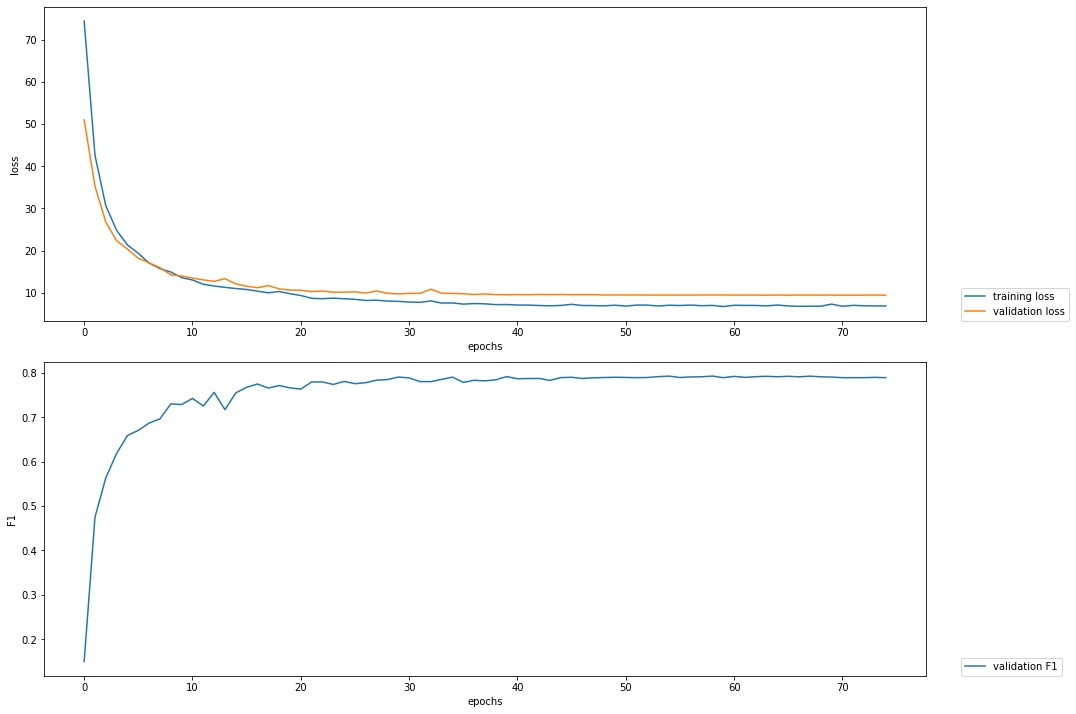

In [26]:
from flair.training_utils import EvaluationMetric
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves("/content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/loss.tsv")

In [27]:
# load model
model = SequenceTagger.load('/content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/best-model.pt')

2021-03-29 15:41:46,212 loading file /content/gdrive/MyDrive/BK/Do_an_TN/NER/Sequence_Labeling_Model/best-model.pt


In [28]:
# create example sentece
sentence = Sentence('Điện thoại di động sam sung A10 mới 99% hàng nhập khẩu hệ điều hành android 11')

# predict tags and print
model.predict(sentence)

print(sentence.to_tagged_string())

Điện <B-type> thoại <I-type> di <I-type> động <I-type> sam <B-nhan_hieu> sung <I-nhan_hieu> A10 <B-model> mới <I-model> 99 <I-model> % hàng nhập khẩu hệ điều hành android 11
